In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline



In [5]:
datos = pd.read_excel(r'C:\Users\Kekis\Desktop\COVID.xlsx')

# DATOS TOMADOS AL 2020-05-03

In [6]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,muertes,suma,hombres,suma hombre,mujeres,suma mujeres
0,2020-05-03,134d54,1,4,17,2,17,17,6,1,...,99,MÃ©xico,99,97,0,3435.0,1,48720.0,0,47119.0
1,2020-05-03,05f125,1,4,9,1,9,9,15,1,...,99,MÃ©xico,99,97,0,NaN,0,NaN,1,NaN
2,2020-05-03,0d2268,1,4,2,2,25,2,2,2,...,99,MÃ©xico,99,2,0,NaN,1,NaN,0,NaN
3,2020-05-03,63132,1,4,9,2,9,9,15,2,...,99,MÃ©xico,99,2,1,NaN,1,NaN,0,NaN
4,2020-05-03,0c0bda,1,12,14,1,14,14,39,2,...,99,MÃ©xico,99,2,0,NaN,0,NaN,1,NaN


In [7]:
tabla=datos[['TIPO_PACIENTE','EDAD','SEXO','ENTIDAD_RES','RESULTADO']]
tabla.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
0,1,42,2,17,1
1,1,51,1,9,1
2,2,51,2,2,1
3,2,57,2,9,1
4,2,44,1,14,2


In [8]:
f1=tabla[(tabla.RESULTADO==1)]
len(f1)

23471

In [9]:
f1.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
0,1,42,2,17,1
1,1,51,1,9,1
2,2,51,2,2,1
3,2,57,2,9,1
9,1,55,2,3,1


In [10]:
np.mean(f1.EDAD)

46.51408120659537

Text(0, 0.5, 'NUMERO DE PERSONAS POR EDAD')

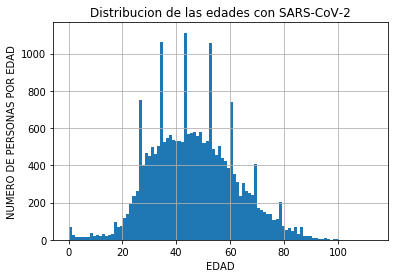

In [11]:
f1.EDAD.hist(bins=100)
plt.title("Distribucion de las edades con SARS-CoV-2")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE PERSONAS POR EDAD")

# Promedio de edad de personas con SARS-Cov-2





# 46.5 AÑOS

In [12]:
f2=f1[(f1.ENTIDAD_RES==9)]

In [13]:
f2.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
1,1,51,1,9,1
3,2,57,2,9,1
19,2,70,2,9,1
30,1,59,2,9,1
31,2,31,2,9,1


Text(0, 0.5, 'NUMERO DE PERSONAS POR EDAD')

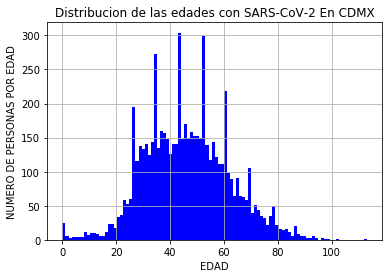

In [14]:
f2.EDAD.hist(bins=100,color='blue')
plt.title("Distribucion de las edades con SARS-CoV-2 En CDMX")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE PERSONAS POR EDAD")

#  Promedio de edad de personas con SARS-Cov-2 en la CDMX  

# 46.2 AÑOS

In [15]:
np.mean(f2.EDAD)

46.42605578930964

In [16]:
f3=f1[(f1.TIPO_PACIENTE==2)]

In [17]:
f3.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
2,2,51,2,2,1
3,2,57,2,9,1
18,2,60,2,26,1
19,2,70,2,9,1
29,2,57,2,24,1


In [18]:
np.mean(f3.EDAD)

53.48198489751888

Text(0, 0.5, 'NUMERO DE PERSONAS  HOSPITALIZADAS POR EDAD')

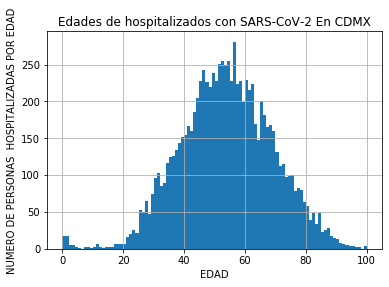

In [19]:
f3.EDAD.hist(bins=100)
plt.title("Edades de hospitalizados con SARS-CoV-2 En CDMX")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE PERSONAS  HOSPITALIZADAS POR EDAD")

# EDAD PROMEDIO DE HOSPITALIZADOS


# 53.4 AÑOS

In [20]:
f4=f3[(f3.SEXO==1)]

In [21]:
f4.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
46,2,51,1,9,1
79,2,30,1,9,1
117,2,62,1,20,1
147,2,51,1,15,1
169,2,72,1,9,1


In [22]:
np.mean(f4.EDAD)

54.10779384035198

Text(0, 0.5, 'NUMERO DE MUJERES HOSPITALIZADAS POR EDAD')

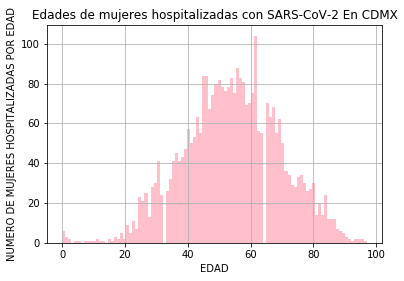

In [23]:
f4.EDAD.hist(bins=100,color='pink')
plt.title("Edades de mujeres hospitalizadas con SARS-CoV-2 En CDMX")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE MUJERES HOSPITALIZADAS POR EDAD")

# Edad promedio de mujeres hospitalizadas

# 54 años

In [24]:
np.median(f1.EDAD)

46.0

# Mediana de edades de las personas con SARS-CoV-2


# 46 AÑOS

# Cuantil al .7 en la CDMX de perosonas con SARS-CoV-2

# 54 AÑOS 

In [25]:
Q=np.quantile(f2.EDAD,.7)
Q

54.0

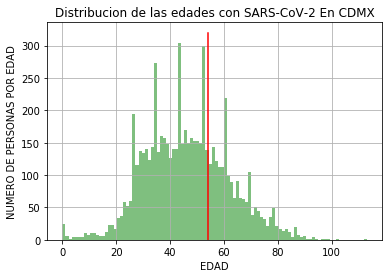

In [26]:
f2.EDAD.hist(bins=100,color='green',alpha=.5)
plt.title("Distribucion de las edades con SARS-CoV-2 En CDMX")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE PERSONAS POR EDAD")
plt.plot([Q,Q],[0,320],color='red')

In [27]:
P=(f1.EDAD<=40)
R=(f1.EDAD>=20)
f5=f1[P&R]
f5.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
31,2,31,2,9,1
36,1,37,1,2,1
58,1,28,1,1,1
59,1,23,2,2,1
61,2,28,2,2,1


In [28]:
f6=f5[(f5.TIPO_PACIENTE==2)]
f6.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
31,2,31,2,9,1
61,2,28,2,2,1
79,2,30,1,9,1
177,2,33,2,9,1
206,2,25,2,9,1


In [29]:
x=len(f5)
y=len(f6)
y/x

0.20505415162454874

# La probabilidad de que una persona diagnosticada con SARS-CoV-2 con edad entre 25 y 40 años sea hospitalizado

# 20.50%

# -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

# -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

#  REMUESTREOS             JACKNIFE Y BOOTSTRAP

# Edad promedio de las personas diagnosticados con SARS-CoV-2

In [30]:
def MEDIA(X):
    n=len(X)
    c=sum([x for x in X])
    return(c/n)

In [31]:
medf1real=MEDIA(f1.EDAD)
medf1real

46.51408120659537

In [32]:
mediaf1=[]
for b in range(12000):
    m=np.random.choice(f1.EDAD,len(f1.EDAD))
    mediaf1.append(MEDIA(m))

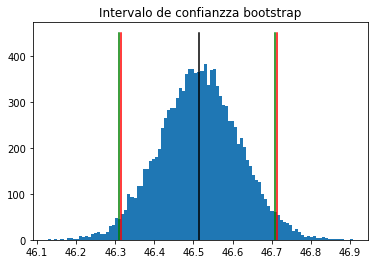

In [39]:
plt.hist(mediaf1,bins=100)
plt.title('Intervalo de confianzza bootstrap')
plt.plot([medf1real,medf1real],[0,450],color='black')
plt.plot([I1[0],I1[0]],[0,450],color='red')
plt.plot([I1[1],I1[1]],[0,450],color='red')
plt.plot([I2[0],I2[0]],[0,450],color='green')
plt.plot([I2[1],I2[1]],[0,450],color='green')

In [35]:
import scipy.stats as sts

In [36]:
np.std(mediaf1)

0.10177656333497126

In [37]:
I1=(medf1real+sts.norm.ppf(.05/2)*np.std(mediaf1),medf1real-sts.norm.ppf(.05/2)*np.std(mediaf1))
I1

(46.31460280798857, 46.71355960520217)

In [38]:
I2=(2*medf1real-np.quantile(mediaf1,1-.05/2)),(2*medf1real-np.quantile(mediaf1,.05/2))
I2

(46.3103830258617, 46.70849239487026)

# Intervalo de confianza de

# (46.31, 46.71)

In [40]:
x1 = list(f1.EDAD)
n1=len(x1)
MEDIA(x1)

46.51408120659537

In [41]:
Tf1_i=[]
for i in range (n1):
    Tf1_i.append(MEDIA(x1[0:i]+x1[i+1:]))

In [42]:
sesgo=(n1-1)*(np.mean(Tf1_i)-MEDIA(x1))
sesgo

0.0

In [43]:
mediaf1_jack=MEDIA(x1)-sesgo
mediaf1_jack

46.51408120659537

In [44]:
f1gorro=[n1*medf1real-(n1-1)*Tf1_i[i]for i in range(n1)]


# VARIANZA JACK

In [45]:
varf1_jack=(((np.var(f1gorro)*n1)/(n1-1))/n1)
varf1_jack

0.01034521273568886

# Edad promedio de las personas diagnosticados con SARS-CoV-2 en la CDMX

In [46]:
medf2real=MEDIA(f2.EDAD)
medf2real

46.42605578930964

In [47]:
mediaf2=[]
for b2 in range(12000):
    m2=np.random.choice(f2.EDAD,len(f2.EDAD))
    mediaf2.append(MEDIA(m2))

In [48]:
If2=(medf2real+sts.norm.ppf(.05/2)*np.std(mediaf2),medf2real-sts.norm.ppf(.05/2)*np.std(mediaf2))
If2

(46.047342639787644, 46.80476893883164)

In [49]:
If22=(2*medf2real-np.quantile(mediaf2,1-.05/2)),(2*medf2real-np.quantile(mediaf2,.05/2))
If22

(46.039418731494465, 46.80177653108929)

# Intervalo de confianza de

# (46.03, 46.8) 

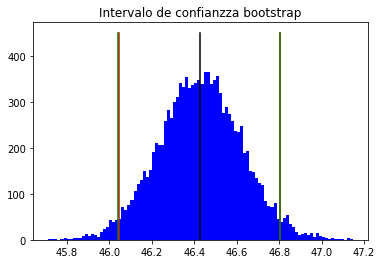

In [50]:
plt.hist(mediaf2,bins=100,color='blue')
plt.title('Intervalo de confianzza bootstrap')
plt.plot([medf2real,medf2real],[0,450],color='black')
plt.plot([If2[0],If2[0]],[0,450],color='red')
plt.plot([If2[1],If2[1]],[0,450],color='red')
plt.plot([If22[0],If22[0]],[0,450],color='green')
plt.plot([If22[1],If22[1]],[0,450],color='green')

In [51]:
x2 = list(f2.EDAD)
n2=len(x2)
MEDIA(x2)

46.42605578930964

In [52]:
Tf2_i=[]
for i in range (n2):
    Tf2_i.append(MEDIA(x2[0:i]+x2[i+1:]))

In [53]:
sesgo=(n2-1)*(np.mean(Tf2_i)-MEDIA(x2))
sesgo

-4.558842192636803e-11

In [54]:
mediaf2_jack=MEDIA(x2)-sesgo
mediaf2_jack

46.42605578935523

In [55]:
f2gorro=[n2*medf2real-(n2-1)*Tf2_i[i]for i in range(n2)]

# VARIANZA JACK

In [56]:
varf2_jack=(((np.var(f2gorro)*n2)/(n2-1))/n2)
varf2_jack

0.037980793192724016

# Edad promedio de las personas hospitalizadas por ser diagnosticados con SARS-CoV-2

In [57]:
medf3real=MEDIA(f3.EDAD)
medf3real

53.48198489751888

In [58]:
mediaf3=[]
for b3 in range(12000):
    m3=np.random.choice(f3.EDAD,len(f3.EDAD))
    mediaf3.append(MEDIA(m3))

In [59]:
If3=(medf3real+sts.norm.ppf(.05/2)*np.std(mediaf3),medf3real-sts.norm.ppf(.05/2)*np.std(mediaf3))
If3

(53.17520182282583, 53.78876797221193)

In [60]:
If32=(2*medf3real-np.quantile(mediaf3,1-.05/2)),(2*medf3real-np.quantile(mediaf3,.05/2))
If32

(53.173675836030206, 53.78728694714132)

# Intervalo de confianza de

# (53.17, 53.7) 

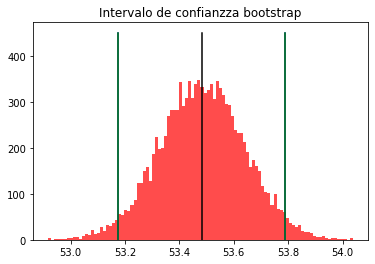

In [61]:
plt.hist(mediaf3,bins=100,color='red',alpha=.7)
plt.title('Intervalo de confianzza bootstrap')
plt.plot([medf3real,medf3real],[0,450],color='black')
plt.plot([If3[0],If3[0]],[0,450],color='blue')
plt.plot([If3[1],If3[1]],[0,450],color='blue')
plt.plot([If32[0],If32[0]],[0,450],color='green')
plt.plot([If32[1],If32[1]],[0,450],color='green')

In [62]:
x3 = list(f3.EDAD)
n3=len(x3)
MEDIA(x3)

53.48198489751888

In [63]:
Tf3_i=[]
for i in range (n3):
    Tf3_i.append(MEDIA(x3[0:i]+x3[i+1:]))

In [64]:
sesgo=(n3-1)*(np.mean(Tf3_i)-MEDIA(x3))
sesgo

0.0

In [65]:
mediaf3_jack=MEDIA(x3)-sesgo
mediaf3_jack

53.48198489751888

In [66]:
f3gorro=[n3*medf3real-(n3-1)*Tf3_i[i]for i in range(n3)]

# VARIANZA JACK

In [67]:
varf3_jack=(((np.var(f3gorro)*n3)/(n3-1))/n3)
varf3_jack

0.024463776629059988

# Edad promedio de las mujeres hospitalizadas por ser diagnosticadas con SARS-CoV-2

In [68]:
medf4real=MEDIA(f4.EDAD)
medf4real

54.10779384035198

In [69]:
mediaf4=[]
for b4 in range(12000):
    m4=np.random.choice(f4.EDAD,len(f4.EDAD))
    mediaf4.append(MEDIA(m4))

In [70]:
If4=(medf4real+sts.norm.ppf(.05/2)*np.std(mediaf4),medf4real-sts.norm.ppf(.05/2)*np.std(mediaf4))
If4

(53.57559404960913, 54.63999363109483)

In [71]:
If42=(2*medf4real-np.quantile(mediaf4,1-.05/2)),(2*medf4real-np.quantile(mediaf4,.05/2))
If42

(53.57164519170334, 54.63545725958517)

# Intervalo de confianza de

# (53.57,54.64)

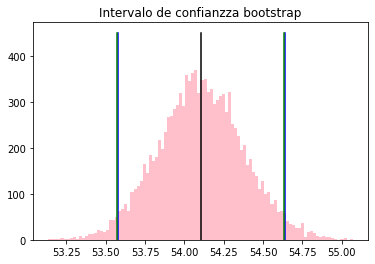

In [72]:
plt.hist(mediaf4,bins=100,color='pink')
plt.title('Intervalo de confianzza bootstrap')
plt.plot([medf4real,medf4real],[0,450],color='black')
plt.plot([If4[0],If4[0]],[0,450],color='blue')
plt.plot([If4[1],If4[1]],[0,450],color='blue')
plt.plot([If42[0],If42[0]],[0,450],color='green')
plt.plot([If42[1],If42[1]],[0,450],color='green')

In [73]:
x4 = list(f4.EDAD)
n4=len(x4)
MEDIA(x4)

54.10779384035198

In [74]:
Tf4_i=[]
for i in range (n4):
    Tf4_i.append(MEDIA(x4[0:i]+x4[i+1:]))

In [75]:
sesgo=(n4-1)*(np.mean(Tf4_i)-MEDIA(x4))
sesgo

2.2602364424528787e-11

In [76]:
mediaf4_jack=MEDIA(x4)-sesgo
mediaf4_jack

54.10779384032938

In [77]:
f4gorro=[n4*medf4real-(n4-1)*Tf4_i[i]for i in range(n4)]

# VARIANZA JACK

In [78]:
varf4_jack=(((np.var(f4gorro)*n4)/(n4-1))/n4)
varf4_jack

0.07490578652918178

# La edad mediana de las personas diagnosticadas con SARS-CoV-2

In [79]:
def MEDIANA(X):
    return(np.median(X))

In [80]:
MEDIANA(f1.EDAD)

46.0

In [81]:
medianaf1real=MEDIANA(f1.EDAD)
medianaf1real

46.0

In [82]:
np.random.choice(f1.EDAD,len(f1.EDAD))

array([26, 31, 44, ..., 47, 55, 36], dtype=int64)

In [83]:
medianaf1=[]
for z1 in range(12000):
    me=np.random.choice(f1.EDAD,len(f1.EDAD))
    medianaf1.append(MEDIANA(me))

In [84]:
Iff1=(medianaf1real+sts.norm.ppf(.05/2)*np.std(medianaf1),medianaf1real-sts.norm.ppf(.05/2)*np.std(medianaf1))
Iff1

(45.70360881571627, 46.29639118428373)

In [85]:
Iff12=(2*medianaf1real-np.quantile(medianaf1,1-.05/2)),(2*medianaf1real-np.quantile(medianaf1,.05/2))
Iff12

(46.0, 46.0)

# Intervalos de confianza

# (45.7,46.2)  años

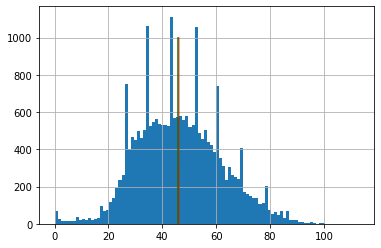

In [126]:
f1.EDAD.hist(bins=100)
plt.plot([medianaf1real,medianaf1real],[0,300],color='red',alpha=.5)
plt.plot([Iff1[0],Iff1[0]],[0,1000],color='red',alpha=.5)
plt.plot([Iff1[1],Iff1[1]],[0,1000],color='red',alpha=.5)
plt.plot([Iff12[0],Iff12[0]],[0,1000],color='green',alpha=.5)
plt.plot([Iff12[1],Iff12[1]],[0,1000],color='green',alpha=.5)

In [87]:
xm = list(f1.EDAD)
nm=len(xm)
MEDIANA(xm)

46.0

In [88]:
Tfm1_i=[]
for i in range (nm):
    Tfm1_i.append(MEDIANA(xm[0:i]+xm[i+1:]))

In [89]:
sesgo=(nm-1)*(np.median(Tfm1_i)-MEDIANA(xm))
sesgo

0.0

In [90]:
medianaf1_jack=MEDIANA(xm)-sesgo
medianaf1_jack

46.0

In [91]:
f1megorro=[nm*medianaf1real-(nm-1)*Tfm1_i[i]for i in range(n4)]

# VARIANZA JACK

In [92]:
varf1mediana_jack=(((np.var(f1megorro)*nm)/(nm-1))/nm)
varf1mediana_jack

0.0

# El cuantil 0.7 de la edad de las personas diagnosticadas con SARS-CoV-2 en la CDMX

In [93]:
Qreal=np.quantile(f2.EDAD,.7)
Qreal

54.0

In [94]:
np.random.choice(f2.EDAD,len(f2.EDAD))

array([29, 37, 58, ..., 47, 38, 46], dtype=int64)

In [95]:
cuan=[]
for q in range(12000):
    qn=np.random.choice(f2.EDAD,len(f2.EDAD))
    cuan.append(np.quantile(qn,.7))

In [96]:
Icuan=(Qreal+sts.norm.ppf(.05/2)*np.std(cuan),Qreal-sts.norm.ppf(.05/2)*np.std(cuan))
Icuan

(53.13353114146653, 54.86646885853347)

In [97]:
Icuan2=(2*Qreal-np.quantile(cuan,1-.05/2)),(2*Qreal-np.quantile(cuan,.05/2))
Icuan2

(53.0, 54.0)

# Intervalo de confianza

# En vista de que varia mucho tomamos el maximo de cada uno en este caso (53,55)

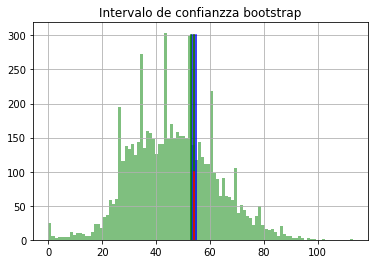

In [123]:
f2.EDAD.hist(bins=100,color='green',alpha=.5)
plt.title('Intervalo de confianzza bootstrap')
plt.plot([Qreal,Qreal],[0,300],color='purple')
plt.plot([Icuan[0],Icuan[0]],[0,300],color='blue')
plt.plot([Icuan[1],Icuan[1]],[0,300],color='blue')
plt.plot([Icuan2[0],Icuan2[0]],[0,300],color='green')
plt.plot([Icuan2[1],Icuan2[1]],[0,300],color='green')
plt.plot([Q,Q],[0,100],color='red')

In [99]:
qu = list(f2.EDAD)
nq=len(qu)
np.quantile(qu,.7)

54.0

In [100]:
Tq_i=[]
for i in range (nq):
    Tq_i.append(np.quantile(qu[0:i]+qu[i+1:],.7))

In [101]:
sesgo=(nq-1)*(np.quantile(Tq_i,.7)-np.quantile(qu,.7))
sesgo

0.0

In [102]:
cuantil_jack=np.quantile(qu,.7)-sesgo
cuantil_jack

54.0

In [103]:
cuant_gorro=[nq*Qreal-(nq-1)*Tq_i[i]for i in range(nq)]

# VARIANZA JACK

In [104]:
var_cuan_jack=(((np.var(cuant_gorro)*nq)/(nq-1))/nq)
var_cuan_jack

0.0

# La probabilidad de que una persona diagnosticada con SARS-CoV-2 con edad entre 25 y 40 años sea hospitalizado

In [105]:
x=len(f5)
y=len(f6)
P=y/x

In [106]:
np.random.choice(f6.EDAD,len(f6.EDAD))

array([26, 30, 36, ..., 40, 35, 37], dtype=int64)

In [107]:
proba=[]
for p1 in range(12000):
    pn=np.random.choice(f6.EDAD,len(f6.EDAD))
    proba.append(len(pn)/x)

In [108]:
Iproba=(P+sts.norm.ppf(.05/2)*np.std(proba),P-sts.norm.ppf(.05/2)*np.std(proba))
Iproba

(0.20505415162454857, 0.2050541516245489)

In [109]:
Iproba2=(2*P-np.quantile(proba,1-.05/2)),(2*P-np.quantile(proba,.05/2))
Iproba2

(0.2050541516245487, 0.20505415162454874)

# Intervalo de confianza

# (0.2050541516245487, 0.20505415162454874)

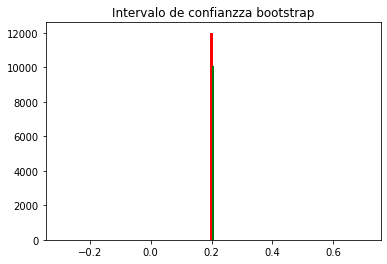

In [110]:
plt.hist(proba,bins=100,color='red')
plt.title('Intervalo de confianzza bootstrap')
plt.plot([P,P],[0,10000],color='purple')
plt.plot([Iproba[0],Iproba[0]],[0,10000],color='blue')
plt.plot([Iproba[1],Iproba[1]],[0,10000],color='blue')
plt.plot([Iproba2[0],Iproba2[0]],[0,10000],color='green')
plt.plot([Iproba2[1],Iproba2[1]],[0,10000],color='green')

In [111]:
pr = list(f6.EDAD)
npr=len(pr)
PR=npr/x

In [112]:
Tpr_i=[]
for i in range(npr):
    Tpr_i.append(len(pr[0:i]+pr[i+1:])/len(f5))

In [113]:
prob_gorro=[npr*PR-(npr-1)*Tpr_i[i]for i in range(npr)]

# VARIANZA JACK

In [114]:
var_prom_jack=(((np.var(prob_gorro)*npr)/(npr-1))/npr)
var_prom_jack

0.0

# CONCLUSIONES

Primeramente hicimos de nuestro material mas amigable, filtramos solo los datos con los cuales ibamos a trabajar.
Despues usando estadistica descriptiva sacamos las medias, medianas, cuantiles y probabilidad de ciertos datos, para asi poder trabajarlos y posteriormente sacarles sus intervalos de confianza y sus varianzas, usando para la varianza el metodo Jack Nife.
Tambien haciamos un remuestreo con el cual podiamos identificar o simular mas datos de los cuales ya teniamos, simulabamos estos datos aleatoriamente y asi sacabamos nuevas medias, medianas o probabilidades. Para asi ver el comportamiento de nuestros datos si los seleccionabamos de forma aleatoria.

Con los datos ya analizados para el primer caso nuestra media o promedio de personas que son identificadas con SARS-CoV-2 fue de 46.5 años, con el remuestreo obtuvimos datos muy cercanos a esa edad, esto quiere decir que muy probablemente nuestra media se siga acumulando ahi a futuro, ya con los intervalos de confianza podemos afirmar que nuestros datos se veran acumulados entre 46 y 47 años y que varian muy poquito. Esto lo podemos relacionar con la mediana de edad, esta representa el Cuartil 2 o el decil 5, esto quiere decir que se acumulara con 50% de probabilidad en esa edad, pero tambien tuvo que haber una secuencia o una repeticion considerable del dato EDAD 46 para que lograra quedar en medio de 23mil y pico de datos, ya que el promedio se ve afectado por otras edades, pero con la mediana comprobamos que la mayoria de edades de personas con SARS-CoV-2 pueden acumularse en los 40 años.

En el caso exclusivo de la CDMX los datos de comportaron muy similar a lo que seria a nivel nacional, claro esta porque tenemos mayoria de casos en la CDMX, volvemos a comprobar que tiene una mayor significacia de acumuluar datos a partir de los cuarenta años, se tiene mas densidad en esta edad, mas exclusivamente a los 46 y nuestro intervalo de confianza volvio a arrojarnos una edad entre 46 y 47 años.

Sabiendo esto, sabemos que la enfermedad SARS-CoV-2 no discrima edades, pero la mayoria de casos afirmados son porque se presentan sintomas mas fuertes que otros no tienen, podemos decir que los sintomas se empiezana a hacer mas graves a partir de los 40 años. Lo anterior lo podemos afirmar con los casos hospitalizados, en el caso nivel nacional nuestro promedio fue 53. 4 años y nuestro intervalo de confianza redondeando 53 a 54 años, habiamos dicho que los sintomas empezaban a ser fuertes a partir de edad 45, con esa base nuestros hospitalizados ya pasan la edad, pero son muy cercanos, podemos decir sin escatimar que efectivamente afectan mas a personas de edad mas avanzada a partir de 50 años, mas especificamente media de 53 años, intervalo de 53 a 54 años, nuestra piramide tiene picos a partir de estas edades. De igual forma en el caso de las mujeres notamos mayor densidad de 53 a 54 años.

Tal vez a grandes rasgos podriamos decir que si tienes entre 53  años en adelante lo mas probable es que te hospitalicen si eres diagnosticado.

De igual forma si tienes una edad menor igual a 40 años la probabilida de que seas hospitalizado es del 20%, no podemos darle poca importancia al 20% ya que  por el tipo de enfermedad y que se transmite de manera rapida, en forma masiva puede llegar a afectar a nuestro sistema de salud, y llegar a casos como italia de sacrificar adultos por gente joven y recordemos que Mexico es un pais joven, con mayoria jovenes, que podrian afectar a nuestros adultos hospitalizados.

Nos dimos cuenta que para cada dato, su intervalo varia ba muy poco, con su varianza JAck era muy baja, en algunos casos 0, podemos decir que a futuro nuestros datos seguiran comportandose de esa manera.